<center><h1>Example on time series related functions <h1><center>

In [3]:
import msdLib as msd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.plotting.register_matplotlib_converters()

In [4]:
# loading time series data
ts_data = pd.read_csv('Datamart-Export_DY_WK100-500 Pound Barrel Cheddar Cheese Prices, Sales, and Moisture Content_20170829_122601.csv').reset_index(drop = True)
ts_data.head()

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content
0,08/19/2017,08/23/2017,07/22,1.5238,1.4489,"9,233,624",34.79
1,08/19/2017,08/23/2017,07/29,1.5636,1.4863,"10,948,266",34.77
2,08/19/2017,08/23/2017,08/05,1.5891,1.5113,"11,520,370",34.81
3,08/19/2017,08/23/2017,08/12,1.6360,1.5526,"10,741,788",34.67
4,08/19/2017,08/23/2017,08/19,1.6543,1.5738,"11,131,479",34.83


In [5]:
# craeting datetime column
ts_data['datetime'] = [pd.Timestamp(year = int(ts_data['Week Ending Date'].iloc[i].split('/')[-1]), 
                              month = int(ts_data['Date'].iloc[i].split('/')[0]), day = int(ts_data['Date'].iloc[i].split('/')[1])) for i in ts_data.index]
# removing duplicate dates from datetime column
ts_data.drop_duplicates('datetime', inplace = True)
# setting datetime as index
ts_data.set_index('datetime', inplace = True)
# sorting indices according to datetime
ts_data.sort_index(inplace = True)
# Converting Sales values from str to int
ts_data['Sales'] = ts_data.Sales.str.replace(',', '').astype(int)
# Expressing Sales unit into millions
ts_data['Sales'] /= 1e6
ts_data.head()

,Week Ending Date,Report Date,Date,Weighted Price,Weighted Price adjusted to 38% moisture,Sales,Moisture Content
datetime,,,,,,,
2012-03-03,03/31/2012,04/04/2012,03/03,1.5837,1.5064,10.751088,34.82
2012-03-10,04/07/2012,04/11/2012,03/10,1.5865,1.5146,11.239556,35.06
2012-03-17,04/14/2012,04/18/2012,03/17,1.5857,1.5056,11.921822,34.70
2012-03-24,04/21/2012,04/25/2012,03/24,1.6333,1.5549,9.924835,34.87
2012-03-31,04/28/2012,05/02/2012,03/31,1.6713,1.5896,9.952335,34.81


In [6]:
# defining plot variables
# variables that will share same axis
same_srs = [ts_data['Weighted Price']]
# list of pandas series which will share parallel individual axes
srs = [ts_data['Moisture Content'], ts_data['Sales']]

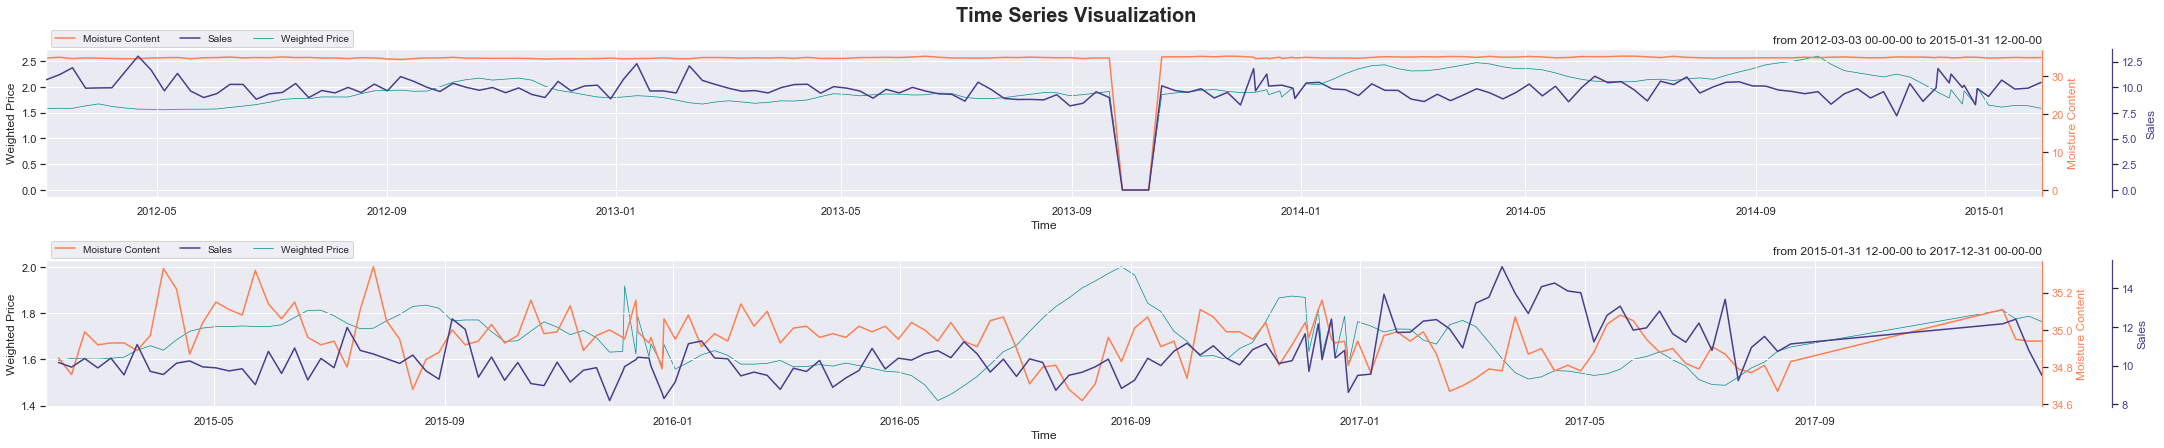

In [7]:
# plotting simple time series plot for multiple time series variables
msd.plot_time_series(same_srs, srs, segs = 2)

### Example of using get_edges_from_ts() function:

In [8]:
# finding edges of start and stop time of the Sales when it lies above 12 million
sales_gr_12 = msd.get_edges_from_ts(ts_data['Sales'], th = 12, del_side = 'down')
sales_gr_12

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Sales_edges,start,stop,duration,interval
0,2012-04-21,2012-04-21,0 days,NaN
1,2013-01-12,2013-01-12,0 days,266 days 00:00:00
2,2013-02-09,2013-02-09,0 days,28 days 00:00:00
3,2015-09-05,2015-09-05,0 days,938 days 00:00:00
4,2016-12-10,2016-12-10,0 days,462 days 00:00:00
5,2016-12-17,2016-12-17,0 days,7 days 00:00:00
6,2017-01-14,2017-01-14,0 days,28 days 00:00:00
7,2017-02-04,2017-02-11,7 days,21 days 00:00:00
8,2017-03-04,2017-04-29,56 days,21 days 00:00:00
9,2017-05-13,2017-05-20,7 days,14 days 00:00:00


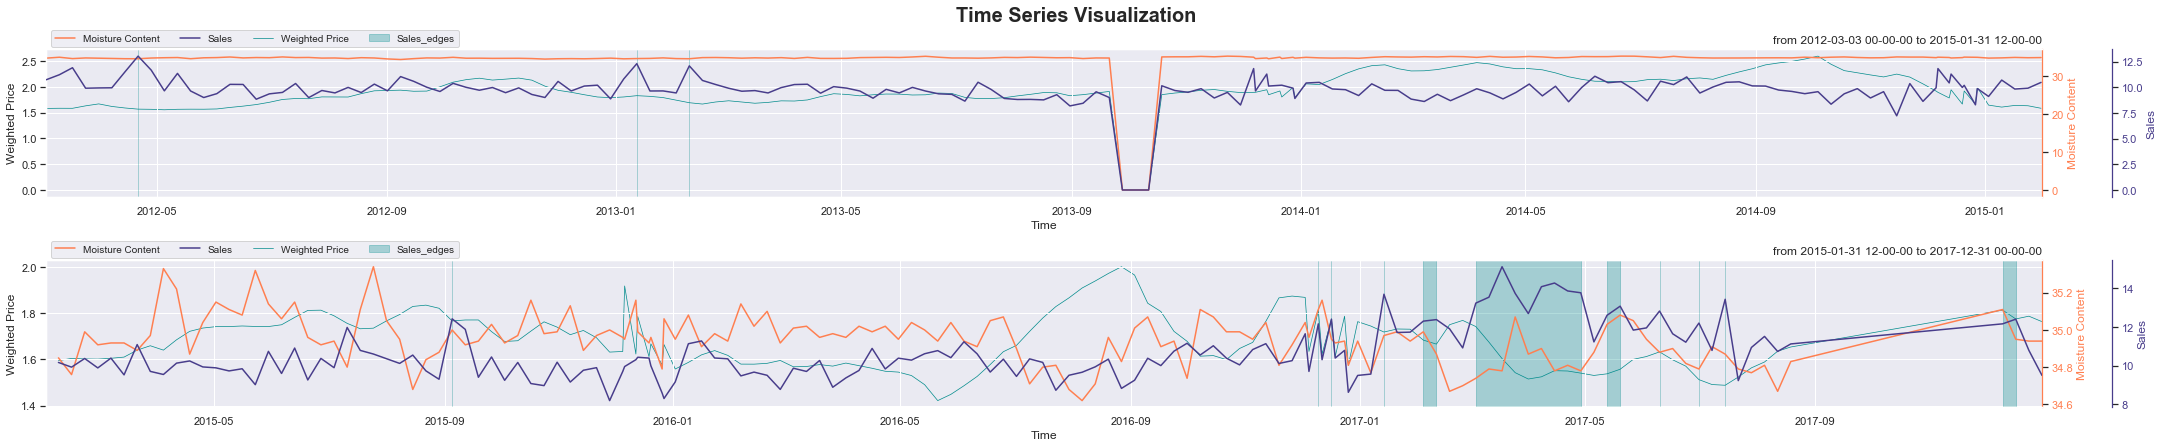

In [9]:
# adding span plots into the figure
msd.plot_time_series(same_srs, srs, segs = 2, spans = [sales_gr_12])

In [10]:
# creating another edge dataframe with Weighted Price when it comes down bellow 1
pr_less_1 = msd.get_edges_from_ts(ts_data['Weighted Price'], th = 1, del_side = 'up')
pr_less_1

Weighted Price_edges,start,stop,duration,interval
0,2013-09-28,2013-10-12,14 days,NaN


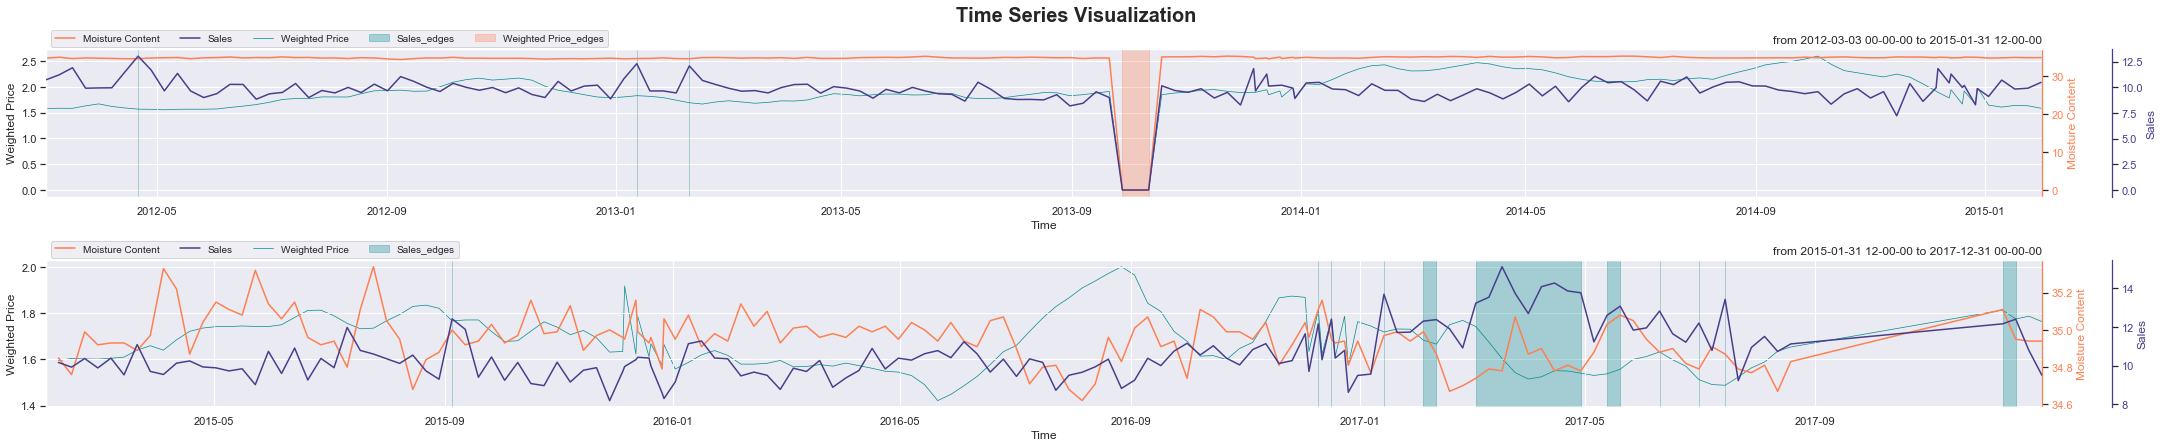

In [11]:
# showing multiple span plots toghether
msd.plot_time_series(same_srs, srs, segs = 2, spans = [sales_gr_12, pr_less_1])

In [12]:
# turning spans with duration 0 to series of timestamps
sales_gr12_ln = sales_gr_12[sales_gr_12['duration'] == pd.Timedelta(0)].start
sales_gr12_ln.name = 'Sales_edges_line'
sales_gr12_ln

0    2012-04-21
1    2013-01-12
2    2013-02-09
3    2015-09-05
4    2016-12-10
5    2016-12-17
6    2017-01-14
10   2017-06-10
11   2017-07-01
12   2017-07-15
Name: Sales_edges_line, dtype: datetime64[ns]

In [13]:
# removing the entries that have 0 duration
sales_gr_12 = sales_gr_12[sales_gr_12['duration'] != pd.Timedelta(0)]
sales_gr_12

Sales_edges,start,stop,duration,interval
7,2017-02-04,2017-02-11,7 days,21 days 00:00:00
8,2017-03-04,2017-04-29,56 days,21 days 00:00:00
9,2017-05-13,2017-05-20,7 days,14 days 00:00:00
13,2017-12-10,2017-12-17,7 days,148 days 00:00:00


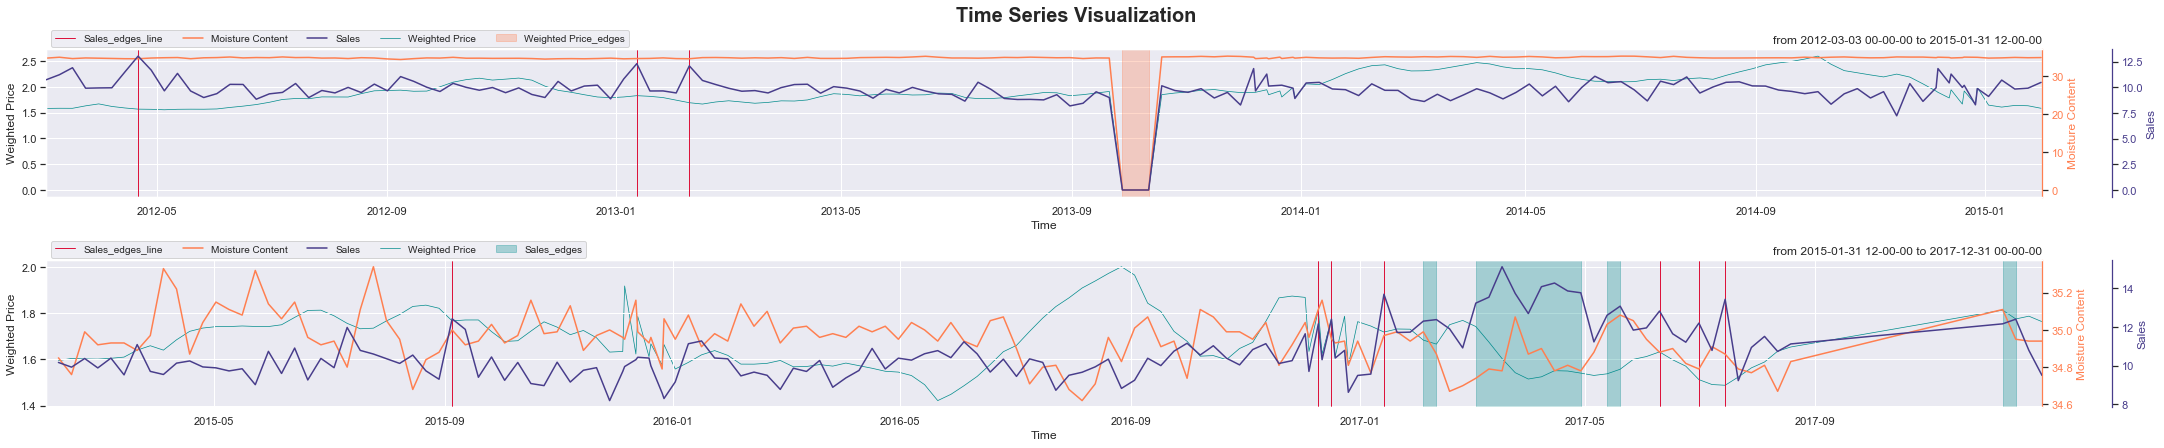

In [14]:
# combined plot with time sereis data, spans and lines
msd.plot_time_series(same_srs, srs, segs = 2, spans = [sales_gr_12, pr_less_1], lines = [sales_gr12_ln])

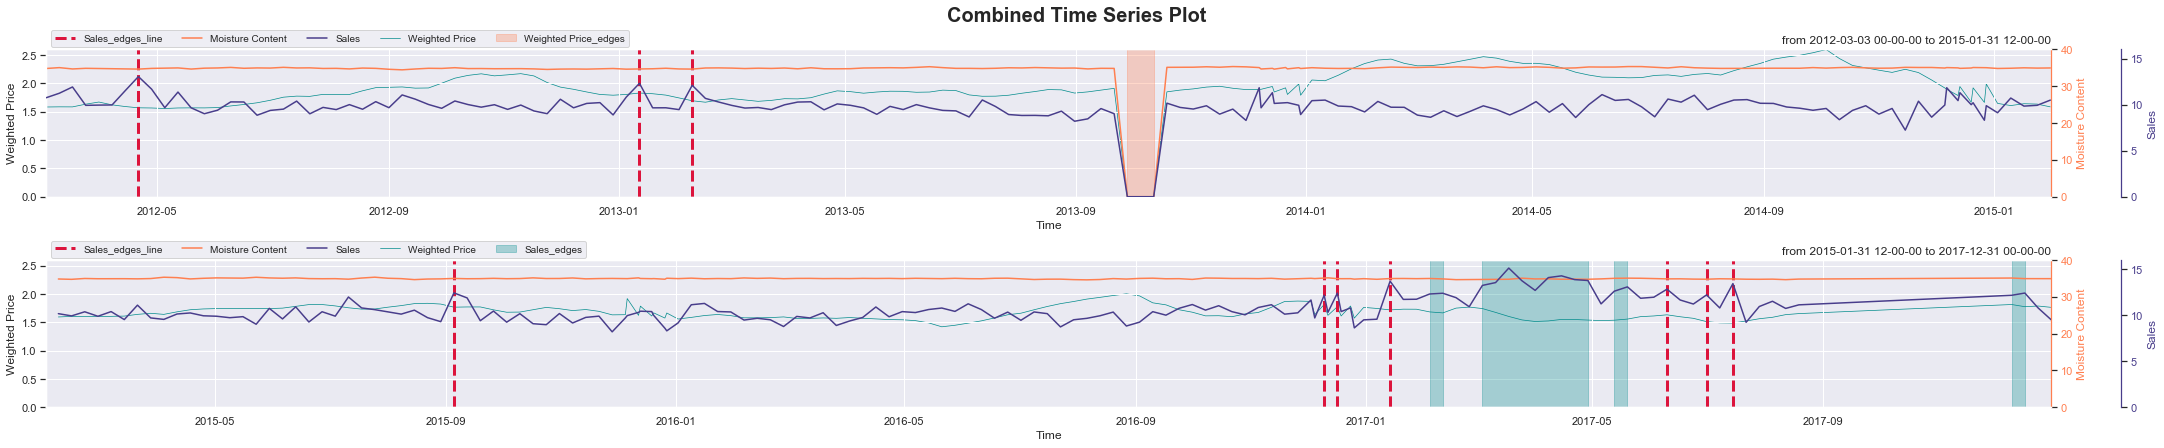

In [15]:
# adding more things into the graph (see documentation for other options)
msd.plot_time_series(same_srs, srs, segs = 2, spans = [sales_gr_12, pr_less_1], lines = [sales_gr12_ln], linestyle = '--', linewidth = 3, fig_title = 'Combined Time Series Plot',
                     ylims = [[0, 2.6], [0, 40], [0, 16]])